### Carregando arquivos:

In [3]:
import pandas as pd

train_df  = pd.read_csv("../data/raw/train.csv")
unique_m_df = pd.read_csv("../data/raw/unique_m.csv")

### Escolhendo input (Coeficiente de Correlação de Pearson):

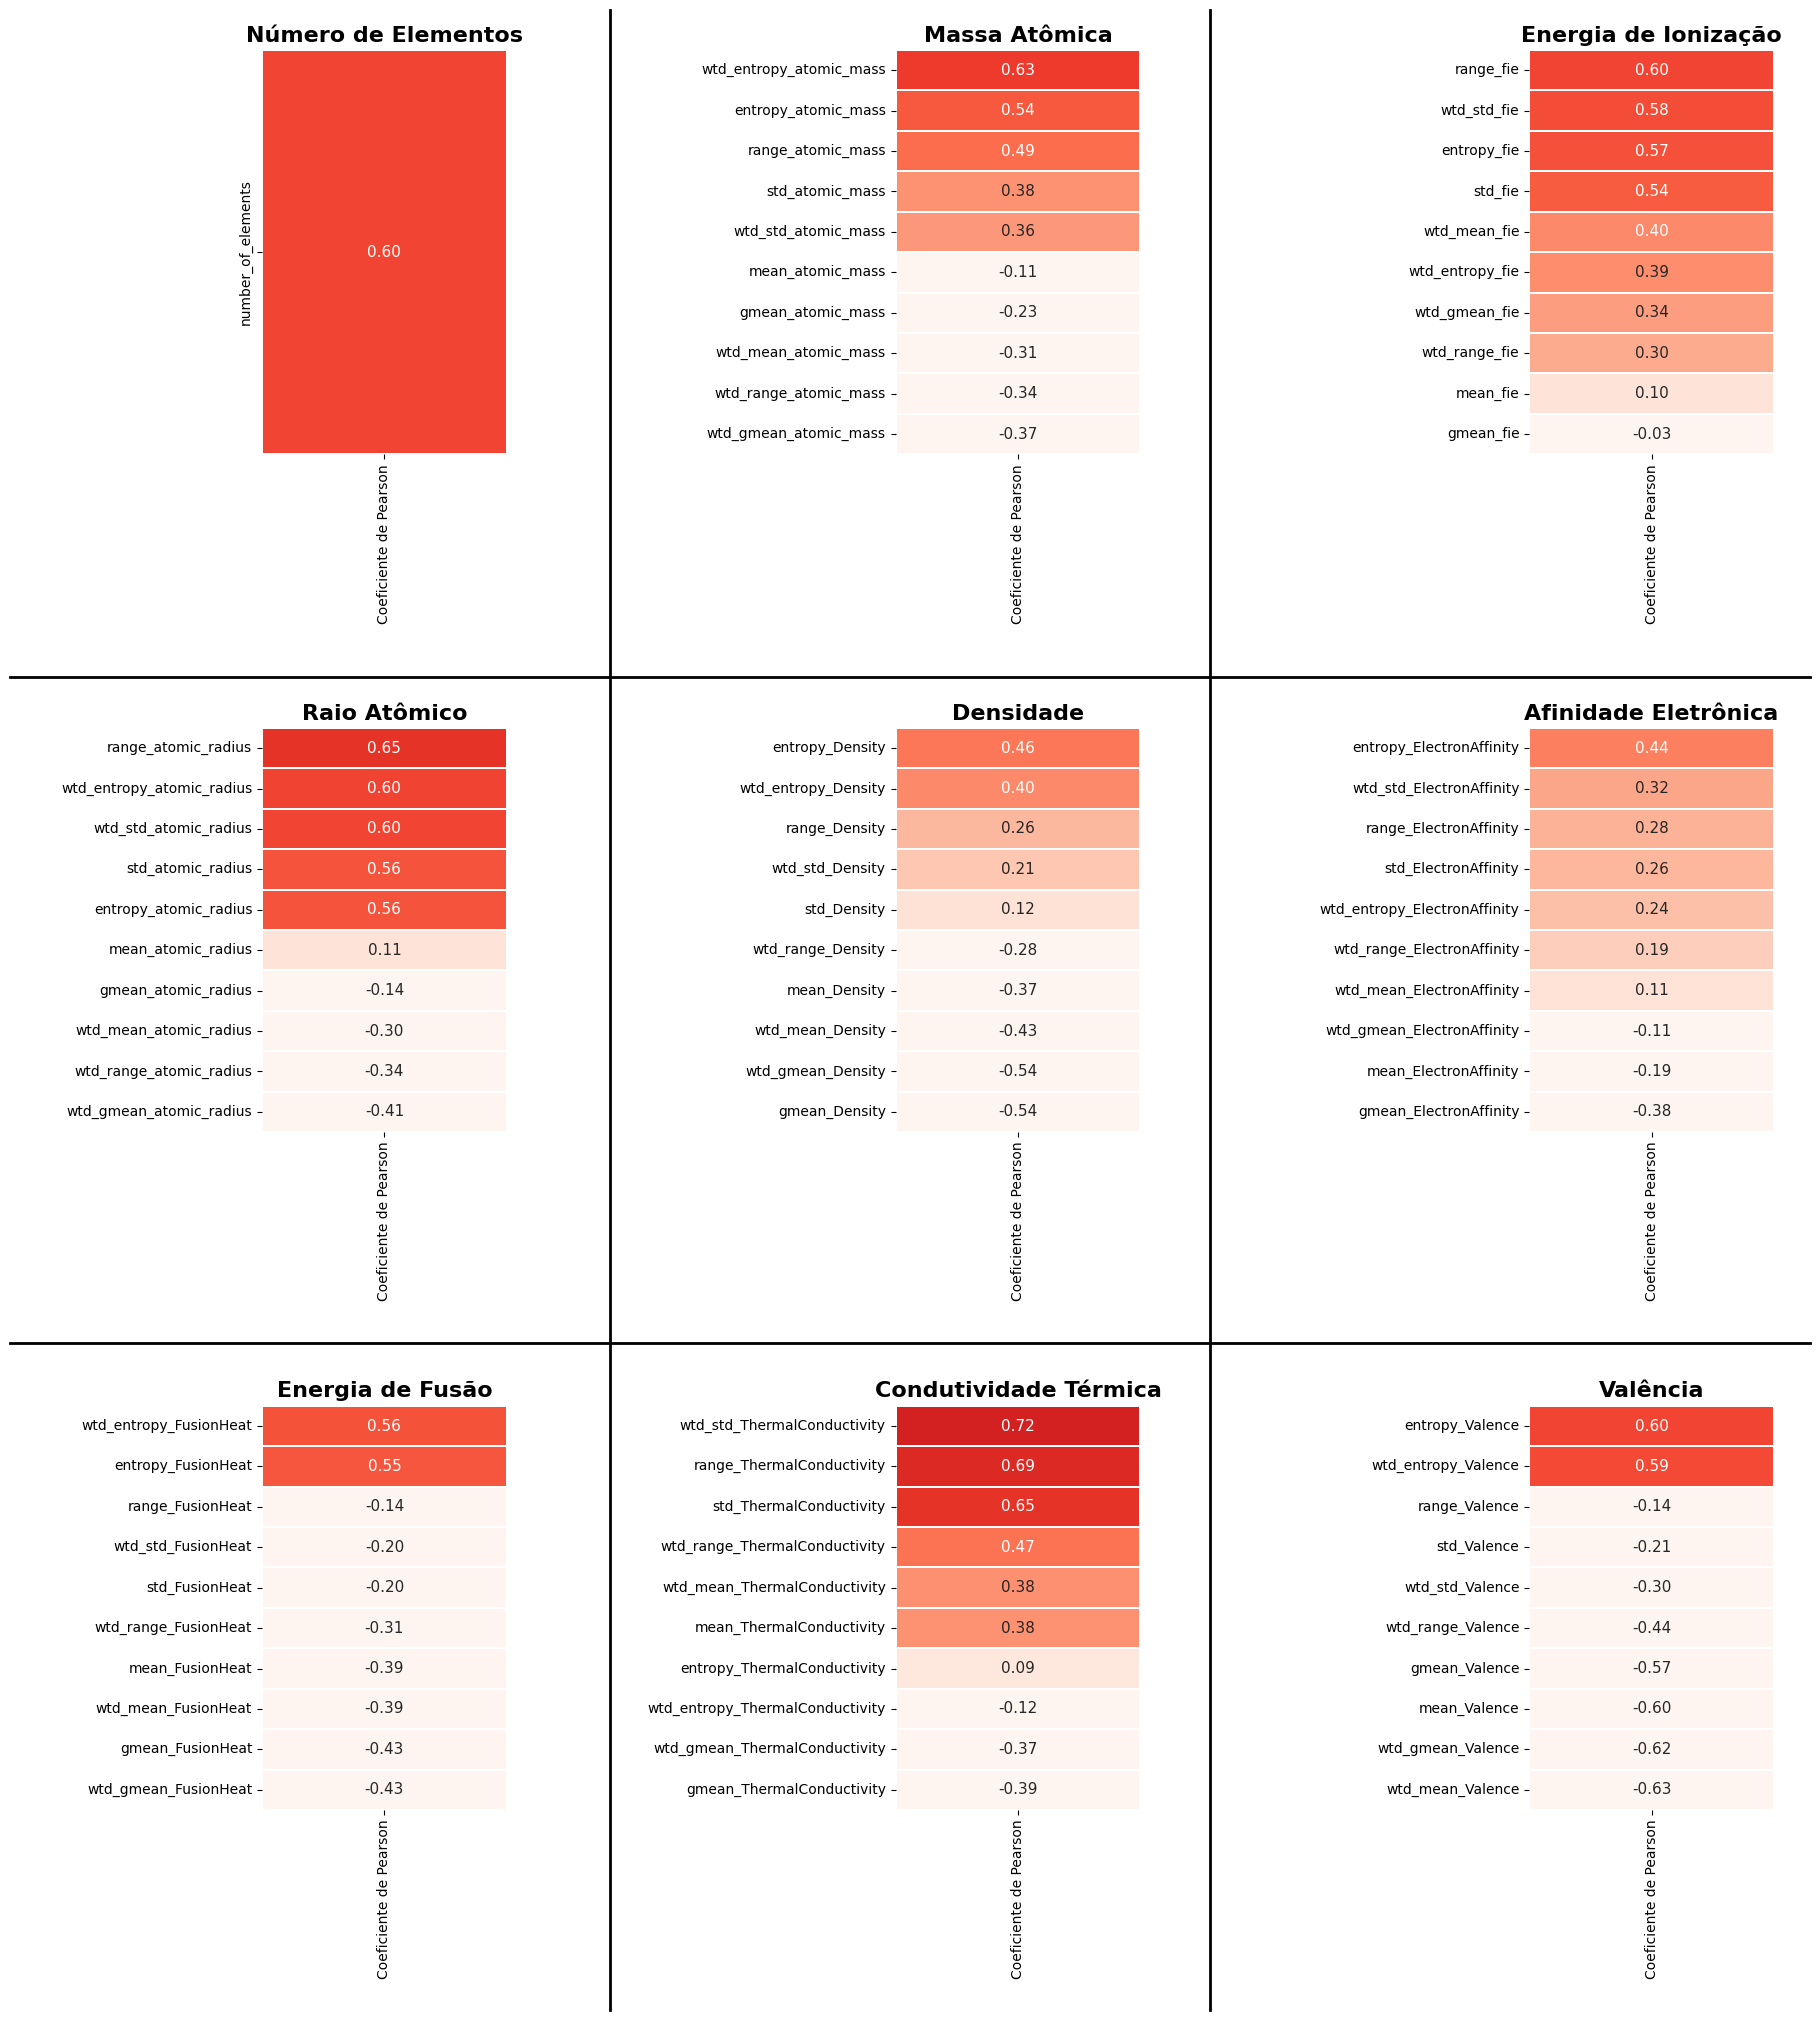

In [8]:
from matplotlib import gridspec, lines
import matplotlib.pyplot as plt
import seaborn as sns

# Define aqui as features por grupo:
grupos_features = {
    "Número de Elementos": [
        "number_of_elements"
    ],
    "Massa Atômica": [
        "mean_atomic_mass", "wtd_mean_atomic_mass", "gmean_atomic_mass", "wtd_gmean_atomic_mass",
        "entropy_atomic_mass", "wtd_entropy_atomic_mass", "range_atomic_mass", "wtd_range_atomic_mass",
        "std_atomic_mass", "wtd_std_atomic_mass"
    ],
    "Energia de Ionização": [
        "mean_fie", "wtd_mean_fie", "gmean_fie", "wtd_gmean_fie",
        "entropy_fie", "wtd_entropy_fie", "range_fie", "wtd_range_fie",
        "std_fie", "wtd_std_fie"
    ],
    "Raio Atômico": [
        "mean_atomic_radius", "wtd_mean_atomic_radius", "gmean_atomic_radius", "wtd_gmean_atomic_radius",
        "entropy_atomic_radius", "wtd_entropy_atomic_radius", "range_atomic_radius", "wtd_range_atomic_radius",
        "std_atomic_radius", "wtd_std_atomic_radius"
    ],
    "Densidade": [
        "mean_Density", "wtd_mean_Density", "gmean_Density", "wtd_gmean_Density",
        "entropy_Density", "wtd_entropy_Density", "range_Density", "wtd_range_Density",
        "std_Density", "wtd_std_Density"
    ],
    "Afinidade Eletrônica": [
        "mean_ElectronAffinity", "wtd_mean_ElectronAffinity", "gmean_ElectronAffinity", "wtd_gmean_ElectronAffinity",
        "entropy_ElectronAffinity", "wtd_entropy_ElectronAffinity", "range_ElectronAffinity", "wtd_range_ElectronAffinity",
        "std_ElectronAffinity", "wtd_std_ElectronAffinity"
    ],
    "Energia de Fusão": [
        "mean_FusionHeat", "wtd_mean_FusionHeat", "gmean_FusionHeat", "wtd_gmean_FusionHeat",
        "entropy_FusionHeat", "wtd_entropy_FusionHeat", "range_FusionHeat", "wtd_range_FusionHeat",
        "std_FusionHeat", "wtd_std_FusionHeat"
    ],
    "Condutividade Térmica": [
        "mean_ThermalConductivity", "wtd_mean_ThermalConductivity", "gmean_ThermalConductivity", "wtd_gmean_ThermalConductivity",
        "entropy_ThermalConductivity", "wtd_entropy_ThermalConductivity", "range_ThermalConductivity", "wtd_range_ThermalConductivity",
        "std_ThermalConductivity", "wtd_std_ThermalConductivity"
    ],
    "Valência": [
        "mean_Valence", "wtd_mean_Valence", "gmean_Valence", "wtd_gmean_Valence",
        "entropy_Valence", "wtd_entropy_Valence", "range_Valence", "wtd_range_Valence",
        "std_Valence", "wtd_std_Valence"
    ]
}


# Configura a figura e o GridSpec:
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(
    nrows=3, ncols=3,
    left=0.12, right=1.00, top=1.00, bottom=0.08,
    wspace=1.0, hspace=0.4
)
axes = [fig.add_subplot(gs[i]) for i in range(9)]

# Calcula o MI para todas as features:
ccp_values = []
features_para_ccp = [f for f in train_df.columns if f != 'critical_temp']

for feature in features_para_ccp:
    ccp = train_df[feature].corr(train_df['critical_temp'])
    ccp_values.append(ccp)

ccp_df_full = pd.DataFrame({
    'Feature': features_para_ccp,
    'Coeficiente de Pearson': ccp_values
})
ccp_df_full.set_index('Feature', inplace=True)

# Plota as features de cada grupo:
for ax, (nome_grupo, features) in zip(axes, grupos_features.items()):
    ccp_df_grupo = ccp_df_full.loc[features].copy()

    ccp_df_grupo.sort_values('Coeficiente de Pearson', ascending=False, inplace=True)

    # Ajuste do tamanho do plot
    pos = ax.get_position()
    ax.set_position([
        pos.x0 + 0.02,
        pos.y0 + 0.02,
        pos.width  - 0.04,
        pos.height - 0.04
    ])

    sns.heatmap(
        ccp_df_grupo,
        annot=True,
        fmt=".2f",
        cmap='Reds',
        center=0.5,
        vmin=0, vmax=1,
        cbar=False,
        linewidths=0.3,
        linecolor='white',
        annot_kws={"size": 11},
        ax=ax
    )
    ax.set_title(nome_grupo, fontsize=16, fontweight='bold')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Desenha as linhas pretas no grid:
for x in [1/3, 2/3]:
    fig.add_artist(lines.Line2D([x, x], [0, 1],
                                transform=fig.transFigure,
                                color='black', linewidth=2))
for y in [1/3, 2/3]:
    fig.add_artist(lines.Line2D([0, 1], [y, y],
                                transform=fig.transFigure,
                                color='black', linewidth=2))

plt.show()